# Abalone Age Prediction

In [1]:
# Essential Library
import pandas as pd

# Charting Library
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Grid Search
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Scoring Metric
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

## Data Loading

In [2]:
df = pd.read_csv('./abalone/abalone.data', header=None)

In [3]:
# Adding features name to the columns
feature_names = ['Sex','Length','Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df.columns = feature_names

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
# Creating Age column and dropping rings column
df['Age'] = df.Rings + 1.5
df = df.drop(columns=['Rings'])

In [6]:
# Check for duplicate entries
df.duplicated().sum()

np.int64(0)

In [7]:
# Check for null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

## Data Analysis

In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


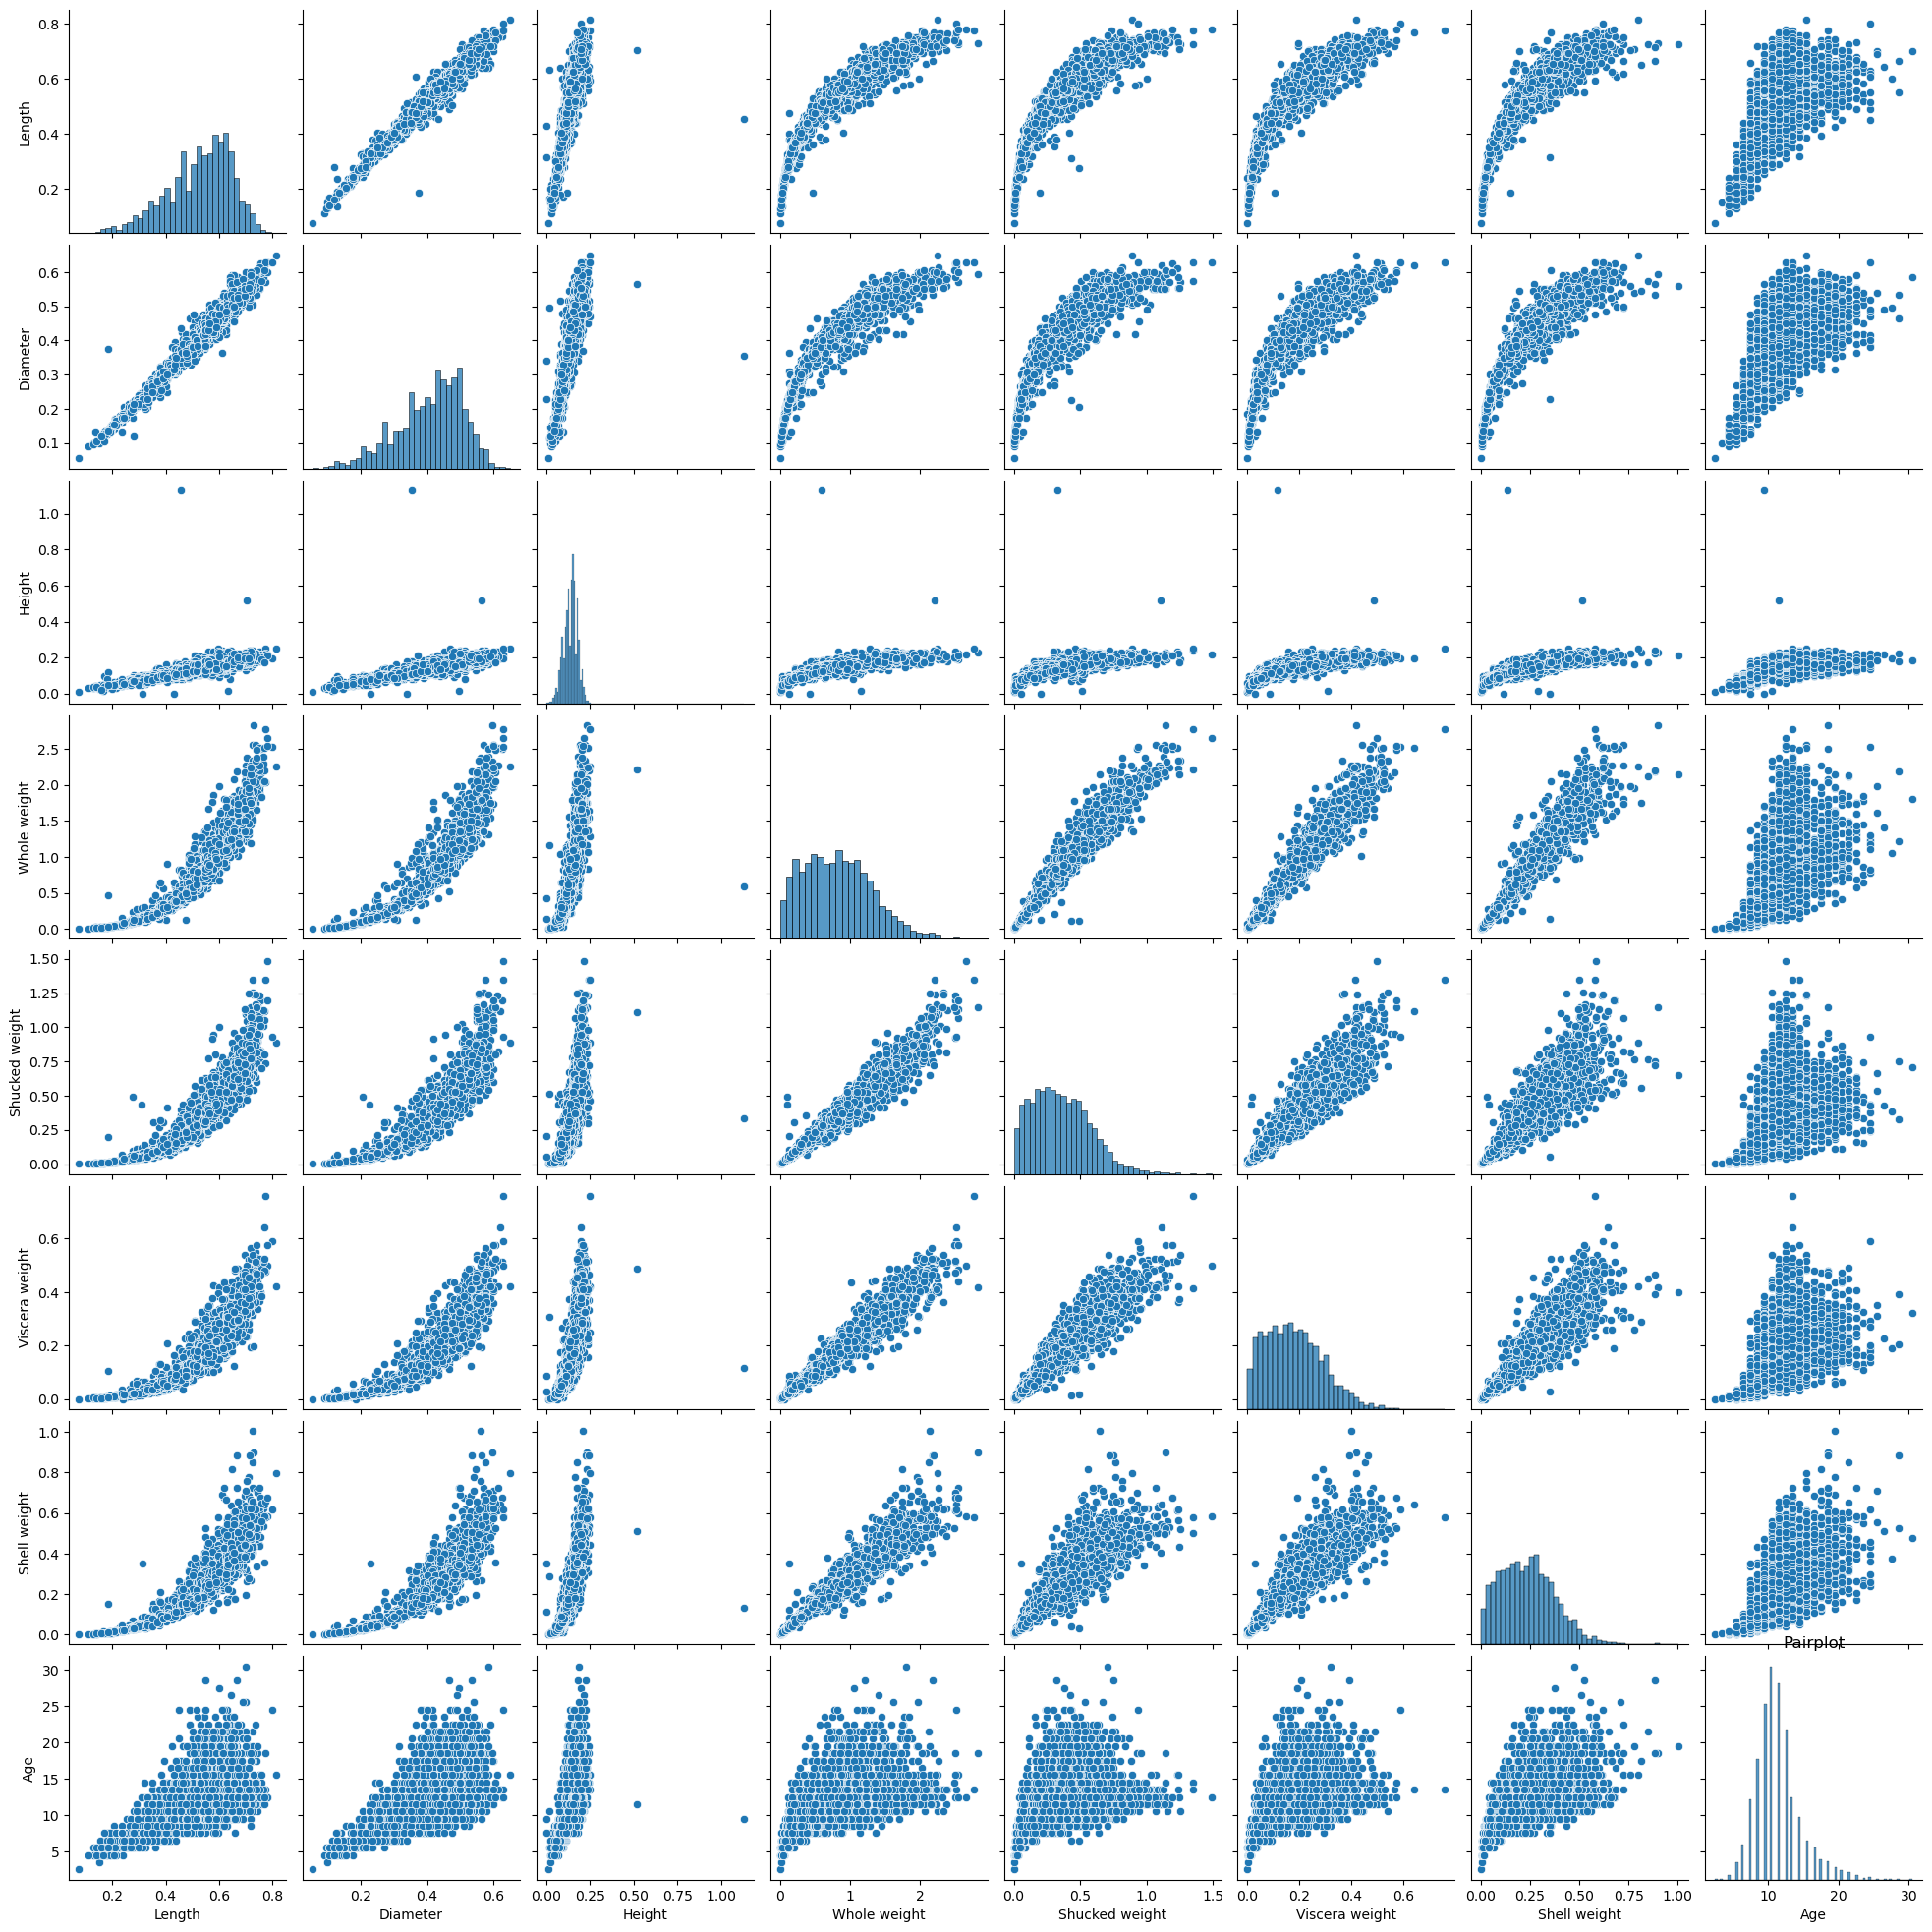

In [9]:
sns.pairplot(df)
plt.title('Pairplot')
plt.show()

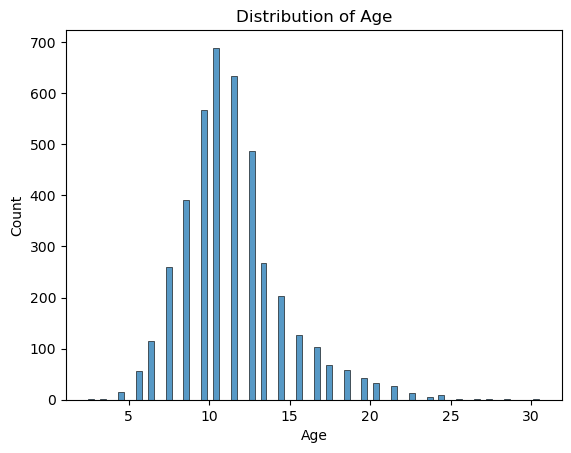

In [10]:
sns.histplot(data=df, x=df.Age)
plt.title('Distribution of Age')
plt.show()

In [11]:
df.corr(numeric_only=True)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


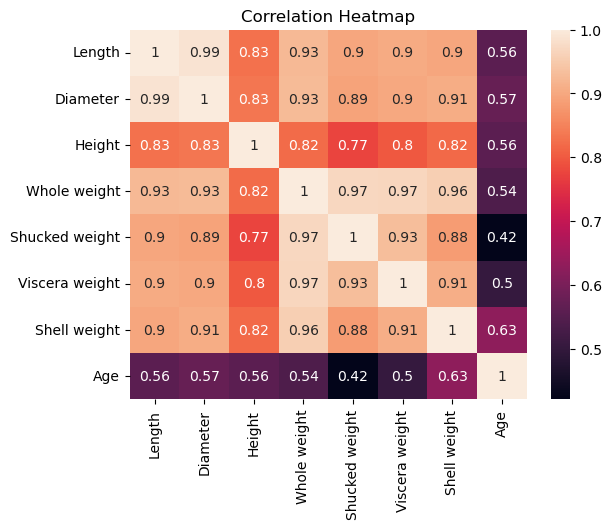

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.title('Correlation Heatmap')
plt.show()

## Data Processing

In [13]:
X = df.drop(columns=['Age']).copy()
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [14]:
y = df['Age']
y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

In [15]:
# one-hot encoding
X = pd.get_dummies(X)
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,False,True,False


In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=88)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=88)

In [17]:
numerical_features = X.select_dtypes(include='number').columns
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [18]:
# One-hot encoded categorical columns
categorical_features = X.select_dtypes(include='bool').columns
categorical_features

Index(['Sex_F', 'Sex_I', 'Sex_M'], dtype='object')

## Linear Regression

### Base Line Model

In [19]:
# base linear regression problem
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Compute metrics
mae = mean_absolute_error(y_val, reg_model.predict(X_val))
mse = mean_squared_error(y_val, reg_model.predict(X_val))
rmse = root_mean_squared_error(y_val, reg_model.predict(X_val))
r2 = r2_score(y_val, reg_model.predict(X_val))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)


Mean Absolute Error: 1.6261281411013688
Mean Squared Error: 5.151755367111859
Root Mean Squared Error: 2.269747864215728
R^2 Score: 0.5229615475963778


In [21]:
print(f'The baseline R^2 score is: {r2} ')

The baseline R^2 score is: 0.5229615475963778 


### Polynomial Features & Pipeline

In [22]:
degree = 2

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('scaler', StandardScaler())
    ]), numerical_features),
    ('cat', 'passthrough', categorical_features)
])

stepsLinearRegression = [
    ('preprocess', preprocessor),
    ('model', LinearRegression())
]

lr_pipe = Pipeline(stepsLinearRegression)

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')),
                                                 ('cat', 'passthrough',
                                                  Index(['Sex_F', 'Sex_I', 'Sex_M'], dtype='object'))])),
                ('model', LinearRegression())])

In [23]:
lr_pipe.named_steps['preprocess'].get_feature_names_out()

array(['num__Length', 'num__Diameter', 'num__Height', 'num__Whole weight',
       'num__Shucked weight', 'num__Viscera weight', 'num__Shell weight',
       'num__Length^2', 'num__Length Diameter', 'num__Length Height',
       'num__Length Whole weight', 'num__Length Shucked weight',
       'num__Length Viscera weight', 'num__Length Shell weight',
       'num__Diameter^2', 'num__Diameter Height',
       'num__Diameter Whole weight', 'num__Diameter Shucked weight',
       'num__Diameter Viscera weight', 'num__Diameter Shell weight',
       'num__Height^2', 'num__Height Whole weight',
       'num__Height Shucked weight', 'num__Height Viscera weight',
       'num__Height Shell weight', 'num__Whole weight^2',
       'num__Whole weight Shucked weight',
       'num__Whole weight Viscera weight',
       'num__Whole weight Shell weight', 'num__Shucked weight^2',
       'num__Shucked weight Viscera weight',
       'num__Shucked weight Shell weight', 'num__Viscera weight^2',
       'num__Viscera 

In [24]:
# Compute metrics
mae = mean_absolute_error(y_val, lr_pipe.predict(X_val))
mse = mean_squared_error(y_val, lr_pipe.predict(X_val))
rmse = root_mean_squared_error(y_val, lr_pipe.predict(X_val))
r2 = r2_score(y_val, lr_pipe.predict(X_val))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 1.5159934171284453
Mean Squared Error: 4.474992806882451
Root Mean Squared Error: 2.115417879966616
R^2 Score: 0.5856279091316188


### Grid Search

In [25]:
# parameter search grid
lr_param_grid = {
    'preprocess__num__poly__degree': [2, 3, 4], 
    'model__fit_intercept': [True, False]
}

In [26]:
# Run grid search - may take a while
lr_grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv=5, scoring='r2', n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')),
                                                                        ('cat',
                                                                         'passthrough',
                                                                         Index(['Sex_F', 'Sex_I', 'Sex_M'], dtype='object'))])),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid={'model__fit_intercept': [True, False],
                         'preprocess__num__poly__degree': [2, 3, 4]},
             scoring='r2')

In [27]:
# Compute metrics
mae = mean_absolute_error(y_val, lr_grid_search.predict(X_val))
mse = mean_squared_error(y_val, lr_grid_search.predict(X_val))
rmse = root_mean_squared_error(y_val, lr_grid_search.predict(X_val))
r2 = r2_score(y_val, lr_grid_search.predict(X_val))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 1.5159934171284495
Mean Squared Error: 4.474992806882458
Root Mean Squared Error: 2.1154178799666172
R^2 Score: 0.5856279091316181


In [28]:
lr_grid_search.best_params_

{'model__fit_intercept': False, 'preprocess__num__poly__degree': 2}

## KNN Regressor

### Testing k = 1

In [29]:
k = 1
knn_reg = KNeighborsRegressor(k)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [30]:
# Compute metrics for Training data
mae = mean_absolute_error(y_train, knn_reg.predict(X_train))
mse = mean_squared_error(y_train, knn_reg.predict(X_train))
rmse = root_mean_squared_error(y_train, knn_reg.predict(X_train))
r2 = r2_score(y_train, knn_reg.predict(X_train))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 Score: 1.0


In [31]:
# Compute metrics - Validation Error
mae = mean_absolute_error(y_val, knn_reg.predict(X_val))
mse = mean_squared_error(y_val, knn_reg.predict(X_val))
rmse = root_mean_squared_error(y_val, knn_reg.predict(X_val))
r2 = r2_score(y_val, knn_reg.predict(X_val))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 2.055023923444976
Mean Squared Error: 8.083732057416269
Root Mean Squared Error: 2.8431904715330396
R^2 Score: 0.25146852761425476


### Finding Best k

In [32]:
error_list = []
for k in range(1,30):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    r2 = r2_score(y_val, knn_reg.predict(X_val))
    print(f"k = {k} R^2: {r2}")
    error_list.append(r2)

k = 1 R^2: 0.25146852761425476
k = 2 R^2: 0.438213727738902
k = 3 R^2: 0.5301710320312023
k = 4 R^2: 0.5298695124975887
k = 5 R^2: 0.5348161558176163
k = 6 R^2: 0.5380166933650274
k = 7 R^2: 0.5371809530500757
k = 8 R^2: 0.5295753001975703
k = 9 R^2: 0.5232900964613885
k = 10 R^2: 0.5343177255681734
k = 11 R^2: 0.5344505853779147
k = 12 R^2: 0.534526143253959
k = 13 R^2: 0.533790431586731
k = 14 R^2: 0.5375968767049397
k = 15 R^2: 0.5439114617817734
k = 16 R^2: 0.5419642340192292
k = 17 R^2: 0.5379886940580081
k = 18 R^2: 0.5387010948460871
k = 19 R^2: 0.5361153083564909
k = 20 R^2: 0.5384369746741257
k = 21 R^2: 0.5403847707683398
k = 22 R^2: 0.5385025624195299
k = 23 R^2: 0.5340517830363408
k = 24 R^2: 0.5335092840104965
k = 25 R^2: 0.5310208199164355
k = 26 R^2: 0.5314001947429197
k = 27 R^2: 0.5315876952367523
k = 28 R^2: 0.5312687339234627
k = 29 R^2: 0.5284282200059043


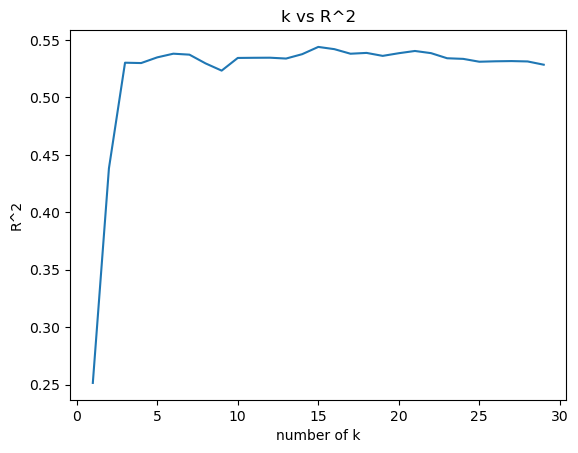

In [33]:
sns.lineplot(x=range(1,30), y=error_list)
plt.xlabel('number of k')
plt.ylabel('R^2')
plt.title('k vs R^2')
plt.show()

### Apply Best k by Visual

In [34]:
k = 10
knn_reg = KNeighborsRegressor(k)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [35]:
# Compute metrics - Validation Error
mae = mean_absolute_error(y_val, knn_reg.predict(X_val))
mse = mean_squared_error(y_val, knn_reg.predict(X_val))
rmse = root_mean_squared_error(y_val, knn_reg.predict(X_val))
r2 = r2_score(y_val, knn_reg.predict(X_val))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 1.5791866028708135
Mean Squared Error: 5.029114832535885
Root Mean Squared Error: 2.2425688021855397
R^2 Score: 0.5343177255681734


### Add Polynomial Features

In [36]:
degree = 2

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('scaler', StandardScaler())
    ]), numerical_features),
    ('cat', 'passthrough', categorical_features)
])

stepsKNNRegression = [
    ('preprocess', preprocessor),
    ('model', KNeighborsRegressor())
]

knn_pipe = Pipeline(stepsKNNRegression)

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')),
                                                 ('cat', 'passthrough',
                                                  Index(['Sex_F', 'Sex_I', 'Sex_M'], dtype='object'))])),
                ('model', KNeighborsRegressor())])

In [37]:
knn_pipe.named_steps['preprocess'].get_feature_names_out()

array(['num__Length', 'num__Diameter', 'num__Height', 'num__Whole weight',
       'num__Shucked weight', 'num__Viscera weight', 'num__Shell weight',
       'num__Length^2', 'num__Length Diameter', 'num__Length Height',
       'num__Length Whole weight', 'num__Length Shucked weight',
       'num__Length Viscera weight', 'num__Length Shell weight',
       'num__Diameter^2', 'num__Diameter Height',
       'num__Diameter Whole weight', 'num__Diameter Shucked weight',
       'num__Diameter Viscera weight', 'num__Diameter Shell weight',
       'num__Height^2', 'num__Height Whole weight',
       'num__Height Shucked weight', 'num__Height Viscera weight',
       'num__Height Shell weight', 'num__Whole weight^2',
       'num__Whole weight Shucked weight',
       'num__Whole weight Viscera weight',
       'num__Whole weight Shell weight', 'num__Shucked weight^2',
       'num__Shucked weight Viscera weight',
       'num__Shucked weight Shell weight', 'num__Viscera weight^2',
       'num__Viscera 

In [38]:
# Compute metrics - Test Error
mae = mean_absolute_error(y_val, knn_pipe.predict(X_val))
mse = mean_squared_error(y_val, knn_pipe.predict(X_val))
rmse = root_mean_squared_error(y_val, knn_pipe.predict(X_val))
r2 = r2_score(y_val, knn_pipe.predict(X_val))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 1.6100478468899522
Mean Squared Error: 5.243732057416268
Root Mean Squared Error: 2.2899196617821045
R^2 Score: 0.5144447577114923


### Grid Search

In [39]:
# parameter search grid
knn_param_grid = {
    'preprocess__num__poly__degree': [2, 3, 4],
    'model__n_neighbors': [10, 12, 14, 16, 18],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [40]:
# Run Grid Search - May take a while
knn_grid_search = GridSearchCV(knn_pipe, knn_param_grid, cv=5, scoring='r2', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')),
                                                                        ('cat',
                                                                         'passthrough',
                                                                         Index(['Sex_F', 'Sex_I', 'Sex_M'], dtype='object'))])),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                              'brute'],
                         'model__n_neighbors': [10, 12, 14, 16, 18],
                         'model__weights': ['uniform', 'distance'],
                         'preprocess__num__poly__degree': [2, 3, 4]},
             scoring='r2')

In [41]:
# Compute metrics - Validation Error
mae = mean_absolute_error(y_val, knn_grid_search.predict(X_val))
mse = mean_squared_error(y_val, knn_grid_search.predict(X_val))
rmse = root_mean_squared_error(y_val, knn_grid_search.predict(X_val))
r2 = r2_score(y_val, knn_grid_search.predict(X_val))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 1.5358620616425889
Mean Squared Error: 4.950118086867415
Root Mean Squared Error: 2.2248860840203517
R^2 Score: 0.541632608091358


In [42]:
knn_grid_search.best_params_

{'model__algorithm': 'auto',
 'model__n_neighbors': 18,
 'model__weights': 'distance',
 'preprocess__num__poly__degree': 4}

## Conclusion

**Base on the metric, the best model will be polynomial features with a degree of 2 and set fit intercept as False.**

In [43]:
best_model = lr_grid_search.best_estimator_
print('Best Parameters:', lr_grid_search.best_params_)

Best Parameters: {'model__fit_intercept': False, 'preprocess__num__poly__degree': 2}


In [44]:
# Compute metrics - Test Error
mae = mean_absolute_error(y_test, best_model.predict(X_test))
mse = mean_squared_error(y_test, best_model.predict(X_test))
rmse = root_mean_squared_error(y_test, best_model.predict(X_test))
r2 = r2_score(y_test, best_model.predict(X_test))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 1.4275537792814168
Mean Squared Error: 3.8492075050440078
Root Mean Squared Error: 1.9619397302272075
R^2 Score: 0.6314590354128076


## End